# Heart Disease Prediction

Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis. The amount of data in the healthcare industry is huge. Data mining turns the large collection of raw healthcare data into information that can help to make informed decisions and predictions.<br>
Machine learning (ML) proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry.<br>
We will be applying several Machine Learning approaches(and eventually comparing them) for classifying whether a person is suffering from heart disease or not, using one of the most used dataset — <a link="https://archive.ics.uci.edu/ml/datasets/Heart+Disease"> Cleveland Heart Disease</a> dataset from the UCI Repository.


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#read data
data=pd.read_csv("cleaveland.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### The dataset consists of 303 individuals data.There are 14 columns.

 1.*Age* : displays the age of the individual.<br>
 2.*Sex* : displays the gender of the individual using the following format : <br>
     >1 = male<br>
     >0 = female.<br>
 3.*Chest-pain type *: displays the type of chest-pain experienced by the individual using the following format :<br>
        > 1 = typical angina <br>
        > 2 = atypical angina <br>
        > 3 = non - anginal pain <br>
        > 4 = asymptotic<br>
 4.*Resting Blood Pressure *: displays the resting blood pressure value of an individual in mmHg (unit)<br>
 5.*Serum Cholestrol* : displays the serum cholestrol in mg/dl (unit)<br>
 6.*Fasting Blood Sugar *: compares the fasting blood sugar value of an individual with 120mg/dl.<br>
        If fasting blood sugar > 120mg/dl then : <br>
           > 1 (true) else :<br>
           >0 (false)<br>
 7.*Resting ECG *: <br>
        > 0 = normal <br>
        > 1 = having ST-T wave abnormality<br> 
        > 2 = left ventricular hyperthrophy<br>
 8.*Max heart rate achieved *: displays the max heart rate achieved by an individual.<br>
 9.*Exercise induced angina* :<br>
        > 1 = yes <br>
        > 0 = no<br>
 10.*ST depression induced by exercise relative to rest *: displays the value which is integer or float.<br>
 11.Peak exercise ST segment : <br>
       > 1 = upsloping <br>
       > 2 = flat <br>
       > 3 = downsloping<br>
 12.*Number of major vessels (0-3) colored by flourosopy *: displays the value as integer or float.<br>
 13.*Thal *: displays the thalassemia : <br>
        > 3 = normal <br>
        > 6 = fixed defect<br> 
        > 7 = reversable defect<br>
 14.*Diagnosis of heart disease* : Displays whether the individual is suffering from heart disease or not :<br>
        > 0 = absence <br>
        > 1,2,3,4 = present.<br>


### Why these parameters:

**Age:**
Age is the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life. Coronary fatty streaks can begin to form in adolescence. It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. Simultaneously, the risk of stroke doubles every decade after age 55.<br>
**Sex:**
Men are at greater risk of heart disease than pre-menopausal women. Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.<br>
**Angina (Chest Pain):**
Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.<br>
**Resting Blood Pressure:**
Over time, high blood pressure can damage arteries that feed your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more.<br>
**Serum Cholesterol:**
A high level of low-density lipoprotein (LDL) cholesterol (the “bad” cholesterol) is most likely to narrow arteries. A high level of triglycerides, a type of blood fat related to your diet, also ups your risk of a heart attack. However, a high level of high-density lipoprotein (HDL) cholesterol (the “good” cholesterol) lowers your risk of a heart attack.<br>
**Fasting Blood Sugar:**
Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.<br>
**Resting ECG:**
For people at low risk of cardiovascular disease, the USPSTF concludes with moderate certainty that the potential harms of screening with resting or exercise ECG equal or exceed the potential benefits. For people at intermediate to high risk, current evidence is insufficient to assess the balance of benefits and harms of screening.<br>
**Max heart rate achieved:** 
The increase in cardiovascular risk, associated with the acceleration of heart rate, was comparable to the increase in risk observed with high blood pressure. It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.<br>
**Exercise induced angina:**
    The pain or discomfort associated with angina usually feels tight, gripping or squeezing, and can vary from mild to severe. Angina is usually felt in the center of your chest but may spread to either or both of your shoulders, or your back, neck, jaw or arm. It can even be felt in your hands. o Types of Angina a. Stable Angina / Angina Pectoris b. Unstable Angina c. Variant (Prinzmetal) Angina d. Microvascular Angina.<br>
**Peak exercise ST segment:**
    A treadmill ECG stress test is considered abnormal when there is a horizontal or down-sloping ST-segment depression ≥ 1 mm at 60–80 ms after the J point. Exercise ECGs with up-sloping ST-segment depressions are typically reported as an ‘equivocal’ test. In general, the occurrence of horizontal or down-sloping ST-segment depression at a lower workload (calculated in METs) or heart rate indicates a worse prognosis and higher likelihood of multi-vessel disease. The duration of ST-segment depression is also important, as prolonged recovery after peak stress is consistent with a positive treadmill ECG stress test. Another finding that is highly indicative of significant CAD is the occurrence of ST-segment elevation > 1 mm (often suggesting transmural ischemia); these patients are frequently referred urgently for coronary angiography.<br>

## Data Preprocess

In [3]:
data['target'] = data.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
data['thal'] = data.thal.fillna(data.thal.mean())
data['ca'] = data.ca.fillna(data.ca.mean())
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


## Data Visualization

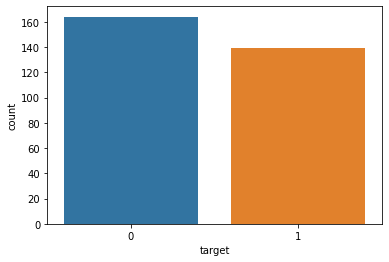

In [4]:
sns.countplot(x="target",data=data)


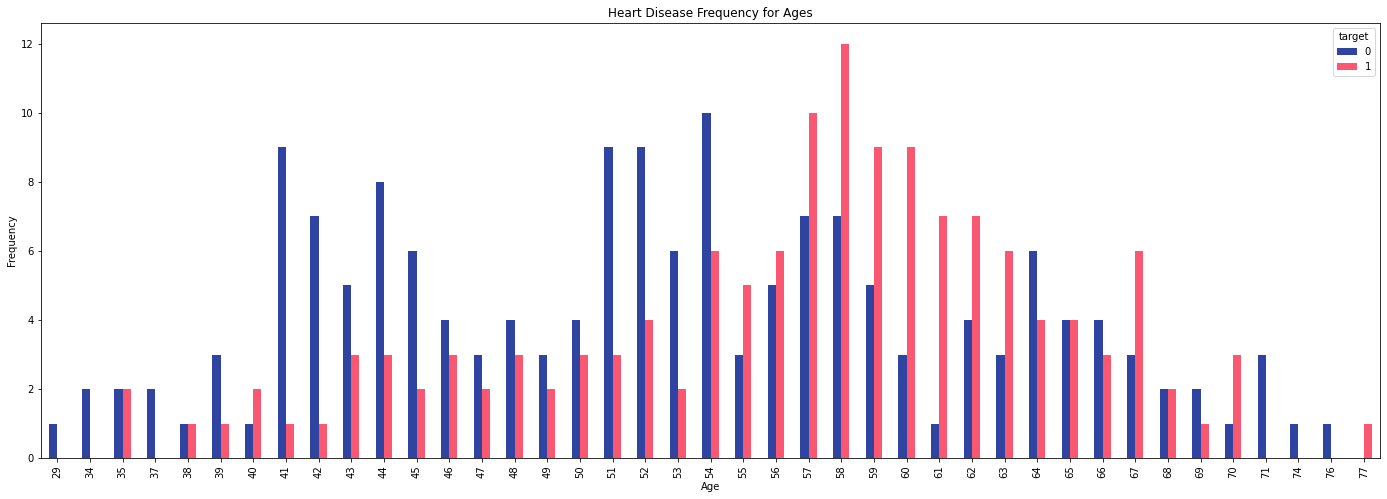

In [5]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(24,8),color=['#2f43a1','#fa5770' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

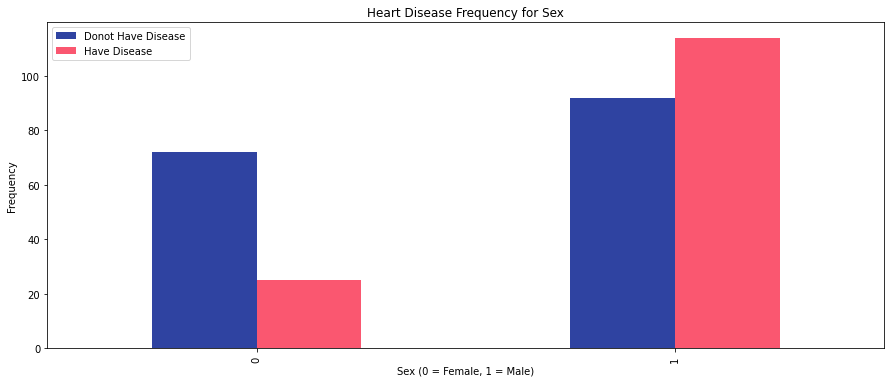

In [6]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#2f43a1','#fa5770' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Donot Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

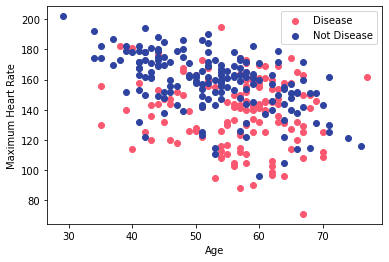

In [7]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)],c="#fa5770")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)],c="#2f43a1")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

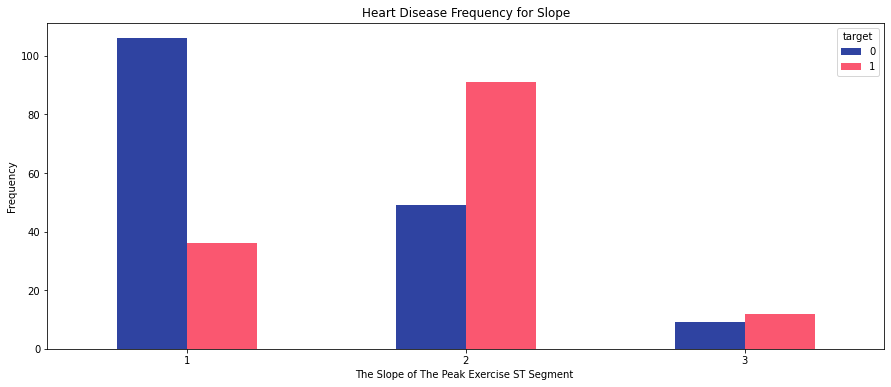

In [8]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#2f43a1','#fa5770'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

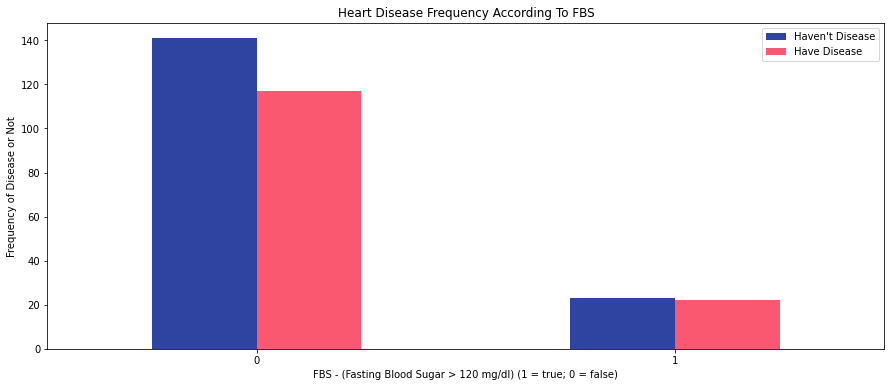

In [9]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#2f43a1','#fa5770'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

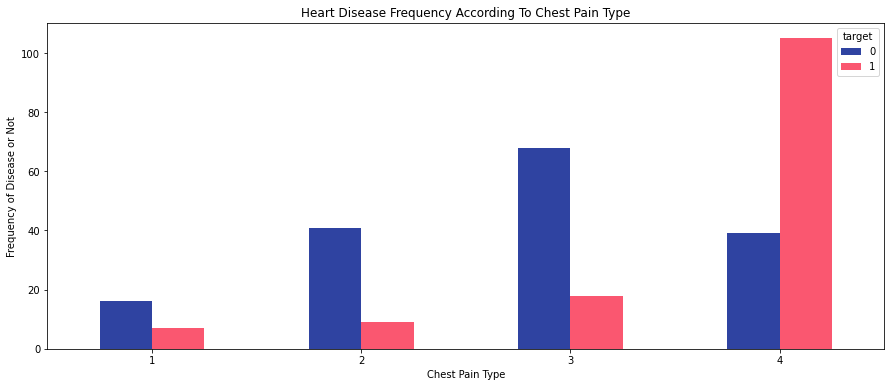

In [10]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#2f43a1','#fa5770'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [11]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [12]:
frames = [data, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_2,cp_3,cp_4,thal_3.0,thal_4.73421926910299,thal_6.0,thal_7.0,slope_1,slope_2,slope_3
0,63,1,1,145,233,1,2,150,0,2.3,...,0,0,0,0,0,1,0,0,0,1
1,67,1,4,160,286,0,2,108,1,1.5,...,0,0,1,1,0,0,0,0,1,0
2,67,1,4,120,229,0,2,129,1,2.6,...,0,0,1,0,0,0,1,0,1,0
3,37,1,3,130,250,0,0,187,0,3.5,...,0,1,0,1,0,0,0,0,0,1
4,41,0,2,130,204,0,2,172,0,1.4,...,1,0,0,1,0,0,0,1,0,0


In [13]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_2,cp_3,cp_4,thal_3.0,thal_4.73421926910299,thal_6.0,thal_7.0,slope_1,slope_2,slope_3
0,63,1,145,233,1,2,150,0,2.3,0.0,...,0,0,0,0,0,1,0,0,0,1
1,67,1,160,286,0,2,108,1,1.5,3.0,...,0,0,1,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2.0,...,0,0,1,0,0,0,1,0,1,0
3,37,1,130,250,0,0,187,0,3.5,0.0,...,0,1,0,1,0,0,0,0,0,1
4,41,0,130,204,0,2,172,0,1.4,0.0,...,1,0,0,1,0,0,0,1,0,0


In [14]:
#Seperating data
X=data.iloc[:,:-1] 
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [15]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00


In [16]:
y=data.iloc[:,-1]
y.head()

0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64

## Splitting data into train and test

In [17]:

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [18]:
accuracy={}#list to store accuracy

## Creating Model for Logistic Regression
<br>
First we will write our functions after that we'll use sklearn library to calculate score.

## Logistic regression
(Understanding terms & writing code)

In logistic regression model we dont want a continuous value but want a probability.so we tranfrom our linear model with the help of a sigmoid function.

The linear model:$$ f(w,b)=wx+b $$ <br>
We pass it through the sigmoid function: 

$$ s(x)=\frac{1}{1+e^x} $$

We get the following function:
$$ \hat y=h_\theta(x)=\frac{1}{(1+e^{-wx+b})}$$
That graphically looks like:
<img src="wk-2.png" width="500px"/>

Cost function:
$$ j(w,b)=j(\theta)=\frac{1}{N}\sum_{i=1}^{n}[y^i\log_{}h_\theta(x^i)+(1-y^i)\log_{}(1-h_\theta(x^i))] $$\
Gradient Descend:
<img src="gradient.png" width="500px"/>

Learning Rate:
<img src="learnrate.png" width="800px"/>

Update rules:
For each items we do: 
<br>
$$ w=w-\alpha.dw $$
$$ b=b-\alpha.db $$
Where $ \alpha $ is the learning rate.
<br><br>
The values'dw' and db' are found by derivating cost function 'j' wrt 'w' and 'b' respectively:
$$ j'(\theta)=\begin{bmatrix} \frac{\partial \mathbf{j}}{\partial w}\\ 
                \frac{\partial \mathbf{j}}{\partial b}\end{bmatrix}=[\cdots]=\begin{bmatrix}
                \sum_{}\frac{1}{N}(2x_i(\hat y-y_i))\\
                \sum_{} \frac{1}{N}(2(\hat y-y_i))
                \end{bmatrix} $$


## Writing the logistic regresssion class

In [39]:
import numpy as np

class LogisticRegressionLocal:

    def __init__(self, learning_rate=0.001, n_iters=15000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * 2*np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) *2*np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))     

In [40]:
# createing  instance of logistic regression class
Logisticregressor1=LogisticRegressionLocal()


In [41]:
##call the fit method and training the model
Logisticregressor1.fit(X_train,y_train)

In [42]:
y_pred_manual=Logisticregressor1.predict(X_test)
y_pred_manual

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0])

In [43]:
accuracy['Logistic reg1']=(100 - np.mean(np.abs(y_pred_manual - y_test))*100)

print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_pred_manual - y_test))*100)))

Manual Test Accuracy: 84.62%


## Using sklearn logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [25]:
accuracy['Logistic reg2']=(100 - np.mean(np.abs(y_pred - y_test))*100)
print("Sklearn linear regression Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_pred - y_test))*100)))

Sklearn linear regression Test Accuracy: 84.62%


## Using KNN model 

In k nearest neighbour problem we take the k nearest postion of the training dataset.The fit method stores the training points and during predict we calculate the eucledian distance of the test points wrt the train points,we store those distances in ascending oreder. then we pick up k no of elements from that list ,and find out which category has appeared the most in those k points.Its more tendng to assume that the most voted category is the catgory the test data belongs to.

To find eucledian distance we use:
$$ dist=\sqrt(x_1-x_2)^2 $$

<img src="knn.png" width="500px"/>


## Writing the KNN class

In [26]:
import numpy as np
from collections import Counter


def euclidean_distance(x1, x2):

    return np.sqrt(np.sum((x1-x2)**2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Computing distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sorting by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extracting the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

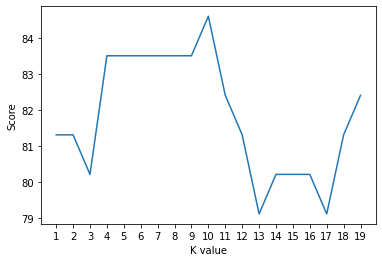

84.61538461538461
Maximum KNN Score is 84.62% for k=10


In [27]:
# try ro find best k value along with accuracy
scoreList1 = []
for i in range(1,20):
    regknn=KNN(k=i)
    regknn.fit(np.asarray(X_train),np.asarray(y_train))
    y_kpred=regknn.predict(np.asarray(X_test))
    acuracy=(100 - np.mean(np.abs(y_kpred - y_test))*100)
    scoreList1.append(acuracy)
plt.plot(range(1,20), scoreList1)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


acc1 = max(scoreList1)
accuracy['KNN 1']=acc1
print(acc1)
k1=scoreList1.index(acc1)
print("Maximum KNN Score is {:.2f}% for k={}".format(acc1,k1+1))

## Using SKlearn KNN model

In [28]:
from sklearn.neighbors import  KNeighborsClassifier

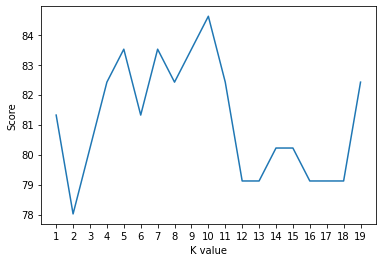

Maximum KNN Score is 84.62% for k=10


In [29]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test)*100)
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)
accuracy['KNN 2']=acc
k=scoreList.index(acc)
print("Maximum KNN Score is {:.2f}% for k={}".format(acc,k+1))

## SKlearn SVM
<br>
<img src="svm.png" width="300px"/>

In [30]:
from sklearn.svm import SVC

In [31]:
svm=SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
accuracy['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 84.62%


## SKlearn Naive Bayes Algorithm
<br>
<img src="bayes.png" width="500px"/>

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test,y_test)*100
accuracy['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 84.62%


## Decision Tree Algorithm
<br>
<img src="descition.png" width="500px"/>

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)*100
accuracy['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 75.82%


## Random Forest Classification
<br>
<img src="randomforest.jpg" width="600px"/>

In [34]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracy['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 83.52%


## Visualizing Accuracy for all Models

{'Logistic reg1': 84.61538461538461, 'Logistic reg2': 84.61538461538461, 'KNN 1': 84.61538461538461, 'KNN 2': 84.61538461538461, 'SVM': 84.61538461538461, 'Naive Bayes': 84.61538461538461, 'Decision Tree': 75.82417582417582, 'Random Forest': 83.51648351648352}


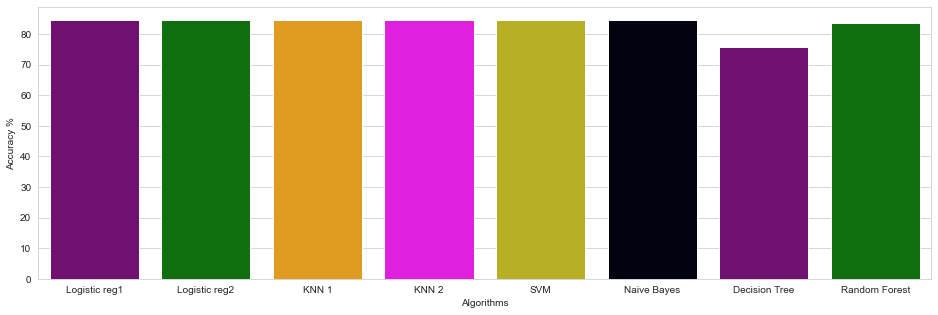

In [35]:
print(accuracy)

colors = ["purple", "green", "orange", "magenta","#CFC60E","#000012"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette=colors)
plt.show()

## Confusion matrix

In [36]:
# Predicted values
y_head_lr = lr.predict(X_test)
y_head_knn = knn2.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_dtc = dtc.predict(X_test)
y_head_rf = rf.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


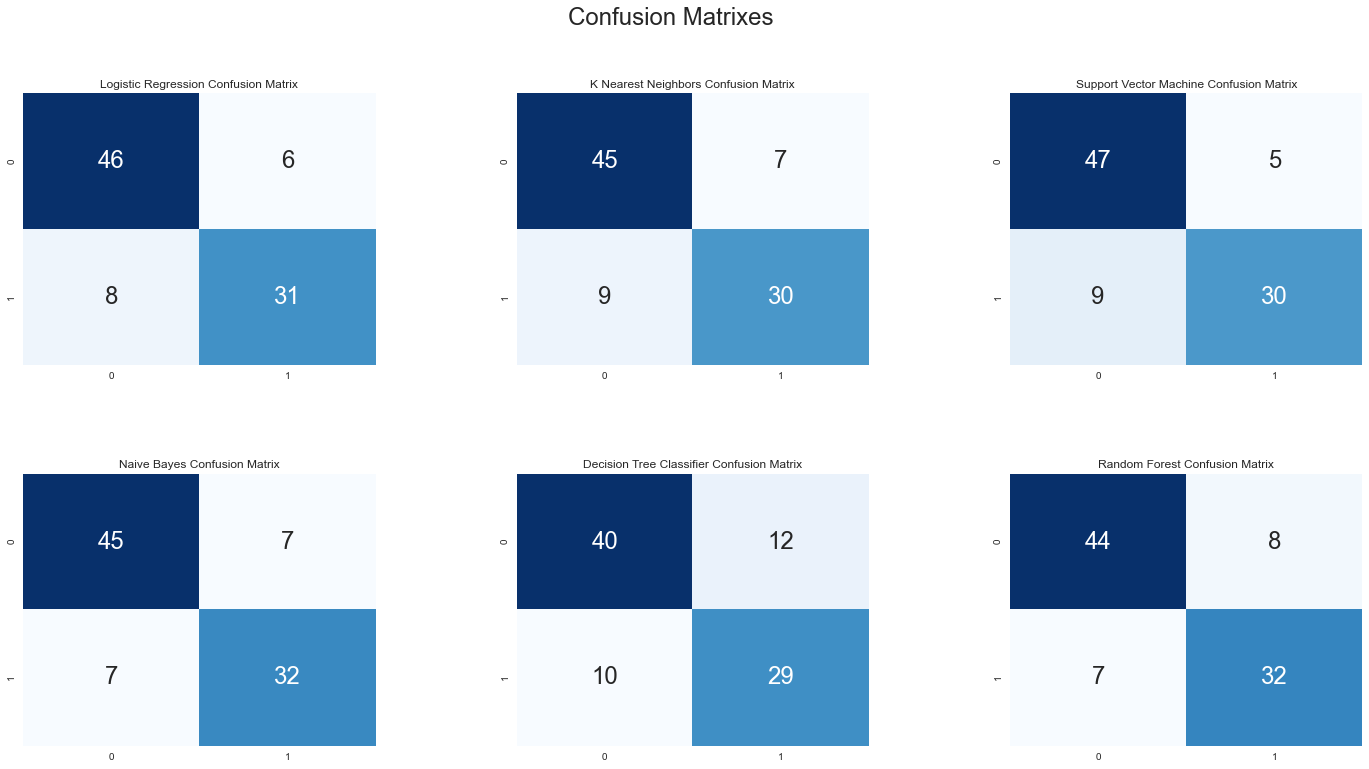

In [38]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Conclution

For our data set these models gave the highest accuracy 85.71.Also we achived the same amount of accuracy for both models of logistic regression and KNN,i.e our code gave the same accuracy as the sklearn library models.In summary, we demonstrated a use case and showed how we can harness the power of ML and apply it real world problems.